## Fundamental Problem of Causal Inference

We use the potential outcome model as the backbone for any causal analysis. The model is very powerful to help stipulate assumptions, evaluate alternative data analysis techniques, think carefully about process of causal exposure.

There are three simple variables:

* $D$ treatment
* $Y$ observed outcome
* $Y_1$ outcome in the treatment state
* $Y_0$ outcome in the no-treatment state

Examples can come from every economic domain: Labor Economics, Education Economics, Industrial Organization, and many more.


## Exploration

We will use our first dataset to illustrate the basic problems of causal analysis. We will use the original data from the article below:

* LaLonde, R. J. (1986). [Evaluating the econometric evaluations of training programs with experimental data](https://www.jstor.org/stable/1806062). *The American Economic Review*, 76(4), 604-620.
  
He summarizes the basic setup as follows:

> The National Supported Work Demonstration (NSW) was temporary employment program desinged to help disadvantaged workers lacking basic job skills move into the labor market by giving them work experience and counseling in sheltered environment. Unlike other federally sponsored employment programs, the NSW program assigned qualified applications randomly. Those assigned to the treatment group received all the benefits of the NSW program, while those assigned to the control group were left to fend for themselves.

What is the effect of the program?

We will have a quick look at a subset of the data to illustrate the fundamental problem of evaluation, i.e. we only observe one of the potential outcomes depending on the treatment status but never both.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We collected a host of data from two other influential textbooks.
df = pd.read_csv("nsw_lalonde.csv")
df.index.set_names("Individual", inplace=True)

In [2]:
df.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,0.411357,24.520776,10.267313,0.800554,0.105263,0.162050,0.779778,3042.896575,5454.635848
std,0.492421,6.625947,1.704774,0.399861,0.307105,0.368752,0.414683,5066.143366,6252.943422
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,936.307950,3951.889000
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3993.207000,8772.004250
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660000,60307.930000


In [3]:
# It is important to check for missing values first.
for column in df.columns:
    assert not df[column].isna().any()

There are numerous discrete variables in this dataset describing the individual's background. How does their distribution look like?

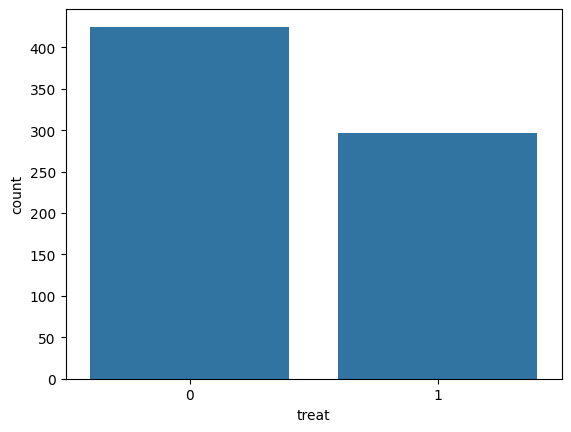

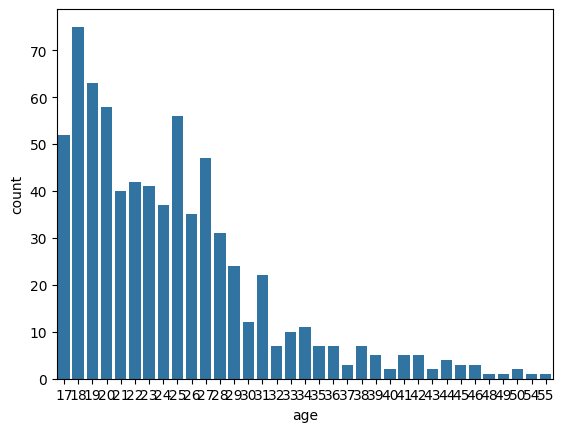

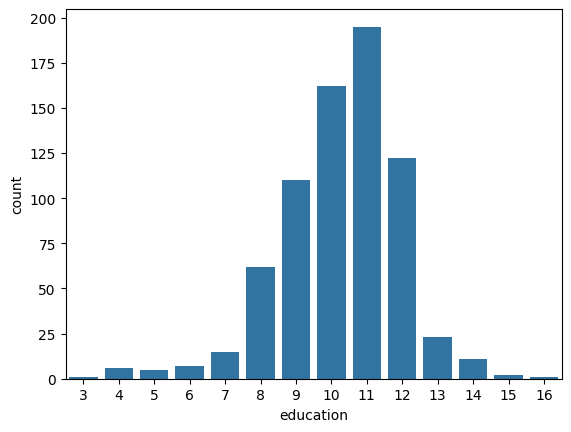

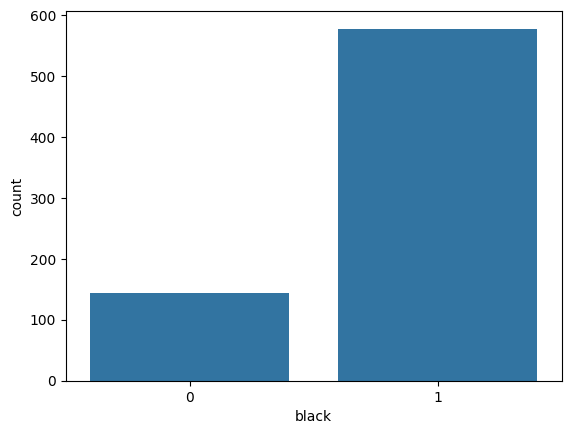

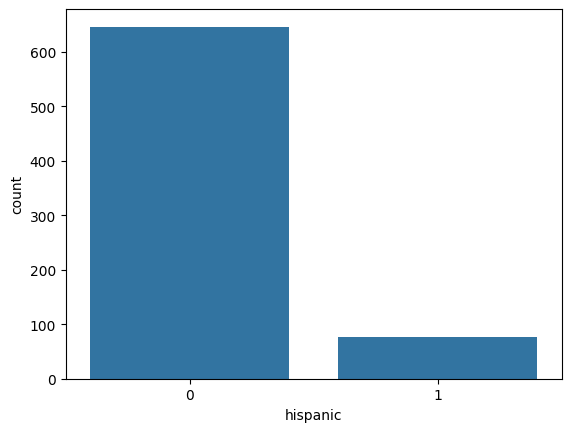

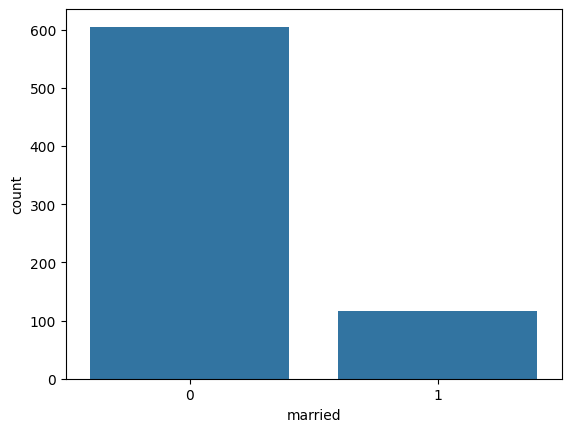

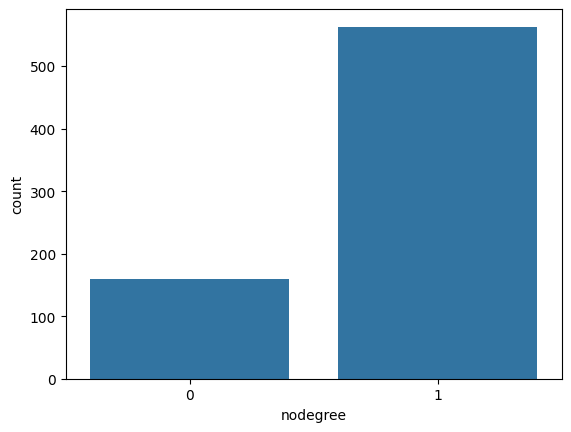

In [4]:
columns_background = [
    "treat",
    "age",
    "education",
    "black",
    "hispanic",
    "married",
    "nodegree",
]
for column in columns_background:
    sns.countplot(x=df[column], color="#1f77b4")
    plt.show()

How about the continous earnings variable?

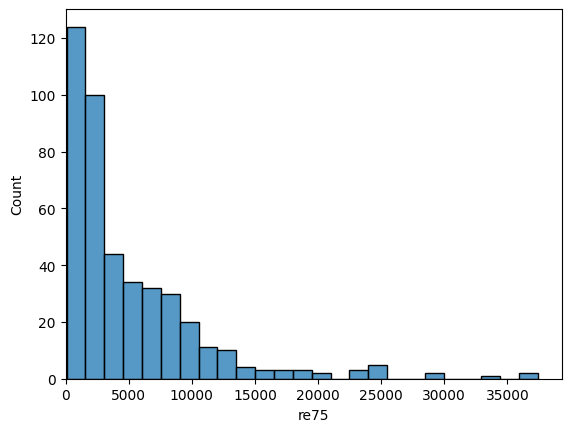

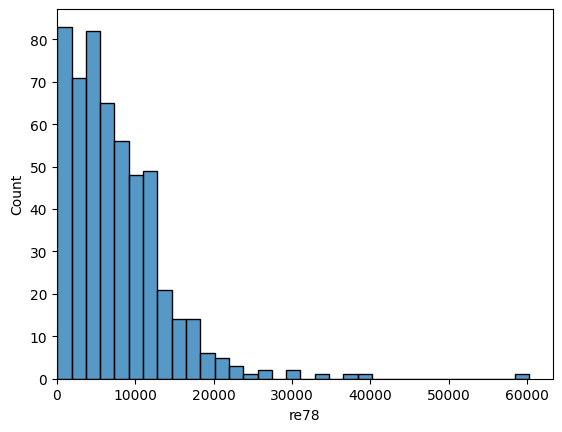

In [5]:
columns_outcome = ["re75", "re78"]
for column in columns_outcome:
    earnings = df[column]

    # We drop all earnings at zero.
    earnings = earnings.loc[earnings > 0]

    ax = sns.histplot(earnings)
    ax.set_xlim([0, None])

    plt.show()

We work under the assumption that the data is generated by an experiment. Let's make sure by checking the distribution of the background variables by treatment status.

In [6]:
info = ["count", "mean", "std"]
for column in columns_background:
    print("\n\n", column.capitalize())
    print(df.groupby("treat")[column].describe()[info])



 Treat
       count  mean  std
treat                  
0      425.0   0.0  0.0
1      297.0   1.0  0.0


 Age
       count       mean       std
treat                            
0      425.0  24.447059  6.590276
1      297.0  24.626263  6.686391


 Education
       count       mean       std
treat                            
0      425.0  10.188235  1.618686
1      297.0  10.380471  1.817712


 Black
       count      mean       std
treat                           
0      425.0  0.800000  0.400471
1      297.0  0.801347  0.399660


 Hispanic
       count      mean       std
treat                           
0      425.0  0.112941  0.316894
1      297.0  0.094276  0.292706


 Married
       count      mean       std
treat                           
0      425.0  0.157647  0.364839
1      297.0  0.168350  0.374808


 Nodegree
       count      mean       std
treat                           
0      425.0  0.814118  0.389470
1      297.0  0.730640  0.444376


What is the data that corresponds to $(Y, Y_1, Y_0, D)$?

In [8]:
# We first create True / False
is_treated = df["treat"] == 1

df["Y"] = df["re78"]
df["Y_0"] = df.loc[~is_treated, "re78"]
df["Y_1"] = df.loc[is_treated, "re78"]

df["D"] = np.nan
df.loc[~is_treated, "D"] = 0
df.loc[is_treated, "D"] = 1

df[["Y", "Y_1", "Y_0", "D"]].sample(10)

,Y,Y_1,Y_0,D
Individual,,,,
48,0.0000,0.0000,NaN,1.0
219,5100.4690,5100.4690,NaN,1.0
432,604.1987,NaN,604.1987,0.0
644,3268.9380,NaN,3268.9380,0.0
232,9750.6600,9750.6600,NaN,1.0
347,0.0000,NaN,0.0000,0.0
710,8469.2750,NaN,8469.2750,0.0
4,289.7899,289.7899,NaN,1.0
571,0.0000,NaN,0.0000,0.0


Let us get a basic impression on how the distribution of earnings looks like by treatment status.

In [9]:
df.groupby("D")["re78"].describe()

,count,mean,std,min,25%,50%,75%,max
D,,,,,,,,
0.0,425.0,5090.048302,5718.088763,0.0,0.0000,3746.701,8329.823,39483.53
1.0,297.0,5976.352033,6923.796427,0.0,549.2984,4232.309,9381.295,60307.93


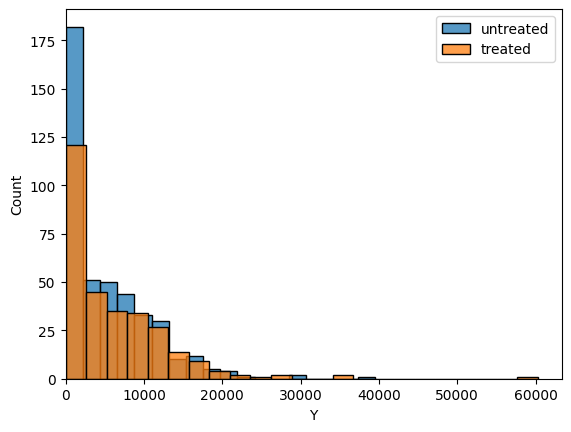

In [10]:
ax = sns.histplot(df.loc[~is_treated, "Y"], label="untreated")
ax = sns.histplot(df.loc[is_treated, "Y"], label="treated")
ax.set_xlim(0, None)
ax.legend()

We are now ready to reproduce one of the key findings from this article. What is the difference in earnings in 1978 between those that did participate in the program and those that did not?

In [12]:
stat = df.loc[is_treated, "Y"].mean() - df.loc[~is_treated, "Y"].mean()
f"${stat:.2f}"

'$886.30'

Earnings are $886.30 higher among those that participate in the treatment compared to those that do not. Can we say even more?